## First Example

Using images of viral, bacterial pneumonia and patients with COVID-19 as well as x-rays of healthy people. This example was based on the post from [Medium](https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5).

It was also to understand the technique of transferring knowledge from trained networks. Shortly after the test, a performance was found to be very desirable, and soon we went on to research new sources of data on this aspect of the theme of this work.

It was found content about COVID-19, COVID-NET, and explored this content later we will work in more detail approaches always related to the data set of this work found.

In [0]:
import numpy as np
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt

In [0]:
!gdown https://drive.google.com/uc?id=1coM7x3378f-Ou2l6Pg2wldaOI7Dntu1a

In [0]:
!unzip Covid_Data_GradientCrescent.zip

In [0]:
train_dir = 'all/train'
test_dir = 'all/test'
img_size = (150, 150)

In [0]:
train_normal = train_dir + '/normal/'
train_pneuB   = train_dir + '/pneumonia_bac/'
train_pneuV   = train_dir + '/pneumonia_vir/'
train_covid  = train_dir + '/covid/'

In [0]:
bac   = glob(train_pneuB + "*.jpeg")
vi   = glob(train_pneuV + "*.jpeg")
covid   = glob(train_covid + "*.jpeg")
normal = glob(train_normal + "*.jpeg")

In [0]:
def show_imgs(num_of_imgs):
    
    for img in range(num_of_imgs):
        pneu_pic   = np.asarray(plt.imread(vi[img]))
        normal_pic = np.asarray(plt.imread(normal[img]))
        bac_pic    = np.asarray(plt.imread(bac[img]))
        covid_pic = np.asarray(plt.imread(covid[img]))
        


        fig = plt.figure(figsize= (15,10))

        normal_plot = fig.add_subplot(221)
        plt.imshow(normal_pic, cmap='gray')
        normal_plot.set_title('Normal')
        plt.axis('off')

        pneu_plot = fig.add_subplot(122)
        plt.imshow(pneu_pic, cmap='gray')
        pneu_plot.set_title('Pneumonia Viral')
        plt.axis('off')

        pneu_plot = fig.add_subplot(223)
        plt.imshow(bac_pic, cmap='gray')
        pneu_plot.set_title('Pneumonia Bacteriana')
        plt.axis('off')

        pneu_plot = fig.add_subplot(342)
        plt.imshow(covid_pic, cmap='gray')
        pneu_plot.set_title('Pneumonia Bacteriana')
        plt.axis('off')

In [0]:
show_imgs(1)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
 rotation_range=50,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.25,
 zoom_range=0.1,
 validation_split = 0.2,
 fill_mode='nearest')

train_batches = train_datagen.flow_from_directory(train_dir,
 target_size=img_size,
 shuffle=True, 
 batch_size=10,
 subset = "training",
 seed=42,
 class_mode="categorical",
  )

valid_batches = train_datagen.flow_from_directory(train_dir,
 target_size=img_size,
 shuffle=True,
 batch_size=10,
 subset = "validation",
 seed=42,
 class_mode="categorical",
  )

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import optimizers

conv_base = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
conv_base.trainable = False
model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.0005), metrics=['acc'])

In [29]:
history = model.fit_generator(train_batches,
 steps_per_epoch = train_batches.n//train_batches.batch_size,
 validation_data = valid_batches,
 validation_steps = valid_batches.n//valid_batches.batch_size,
 epochs = 100,
 )

Epoch 69/100
21/21 [==============================] - 5s 248ms/step - loss: 0.2538 - acc: 0.9272 - val_loss: 0.6964 - val_acc: 0.7000
Epoch 70/100
21/21 [==============================] - 5s 235ms/step - loss: 0.1938 - acc: 0.9272 - val_loss: 0.8032 - val_acc: 0.7000
Epoch 71/100
21/21 [==============================] - 5s 239ms/step - loss: 0.2408 - acc: 0.9029 - val_loss: 0.3563 - val_acc: 0.8400
Epoch 72/100
21/21 [==============================] - 5s 232ms/step - loss: 0.2387 - acc: 0.9126 - val_loss: 0.7650 - val_acc: 0.7600
Epoch 73/100
21/21 [==============================] - 5s 236ms/step - loss: 0.2776 - acc: 0.8981 - val_loss: 0.8396 - val_acc: 0.6800
Epoch 74/100
21/21 [==============================] - 5s 249ms/step - loss: 0.2445 - acc: 0.8835 - val_loss: 0.7569 - val_acc: 0.7800
Epoch 75/100
21/21 [==============================] - 5s 250ms/step - loss: 0.3428 - acc: 0.8689 - val_loss: 0.9971 - val_acc: 0.7000
Epoch 76/100
21/21 [==============================] - 5s 238ms

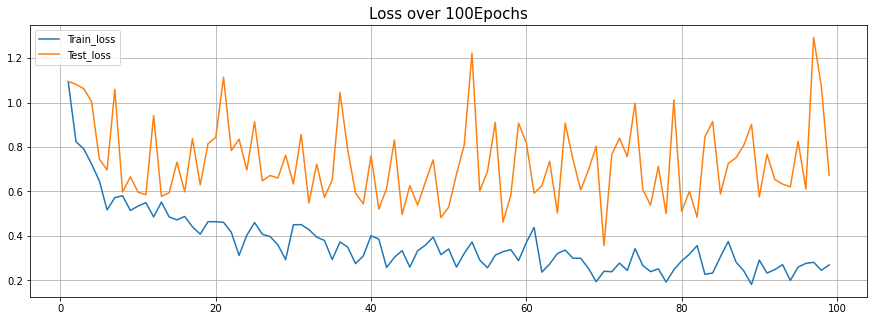

In [30]:
import matplotlib.pyplot as plt
def plot_acc_loss(result, epochs):
 loss = result.history['loss']
 val_loss = result.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(history, 100)

In [31]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
 test_dir,
 target_size=img_size,
 batch_size=1,
 shuffle=False,
 class_mode='categorical')

x = model.evaluate_generator(
 test_generator,
 steps = test_generator.n,
 verbose = 1
 )
print('Test loss:', x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
36/36 [==============================] - 1s 16ms/step - loss: 0.5970 - acc: 0.7222
Test loss: 0.5970192551612854
Test accuracy: 0.7222222089767456
